# NYCDSA Machine Learning Project - House Prices

## Feature Engineering

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sn
import prince

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
%store -r train_raw

In [3]:
train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NotAvail,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NotAvail,NotAvail,NotAvail,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NotAvail,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NotAvail,NotAvail,NotAvail,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NotAvail,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NotAvail,NotAvail,NotAvail,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NotAvail,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NotAvail,NotAvail,NotAvail,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NotAvail,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NotAvail,NotAvail,NotAvail,0,12,2008,WD,Normal,250000


In [5]:
train_raw.groupby(['YrSold']).SalePrice.agg(['mean','std','count'])

,mean,std,count
YrSold,,,
2006,182549.458599,79426.838855,314
2007,186063.151976,85768.171410,329
2008,177360.838816,69735.610685,304
2009,179432.103550,80879.237311,338
2010,177393.674286,80451.280085,175


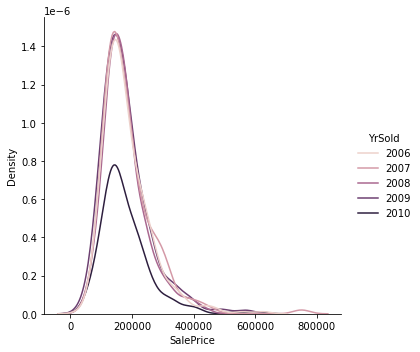

In [6]:
sn.displot(train_raw, x='SalePrice', hue='YrSold', kind="kde")

In [28]:
y = train_raw.SalePrice

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X = train_raw.iloc[:,0:80].copy()
#X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X['HouseAge'] = X.YrSold - X.YearBuilt
X['RemodelAge'] = X.YrSold - X.YearRemodAdd
X = X.drop(columns = ['YrSold','YearBuilt','YearRemodAdd'])
X.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
1stFlrSF        

### Factor Analysis for Mixed Data

In [37]:
famd = prince.FAMD(
    n_components=10,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=2)
famd_X = famd.fit(X)

In [50]:
famd_X.row_coordinates(X)

,0,1,2,3,4,5,6,7,8,9
0,0.828321,0.205877,-0.795960,-0.689015,0.146837,0.089005,0.108909,0.153517,0.232639,-0.770347
1,0.026831,-0.698462,0.542603,-0.361805,-0.287485,-0.227850,0.337881,-0.010931,-0.251907,-0.013048
2,1.036611,0.115722,-0.646811,-0.631233,0.028166,0.051057,0.106821,0.420341,-0.066533,-0.350479
3,-0.331278,0.609963,0.493780,0.061601,-0.526799,0.150972,-1.050487,0.493027,-0.119261,-0.160645
4,1.916501,0.643990,-0.154442,-0.635014,0.053523,-0.138385,0.034380,0.275739,-0.210668,-0.569465
...,...,...,...,...,...,...,...,...,...,...
1455,0.481679,0.681655,-0.780528,-0.252013,-0.257874,-0.353263,0.370002,0.093335,0.231783,-0.003816
1456,0.709673,-0.787467,1.385640,-0.086791,0.167266,-0.383046,0.369663,-0.446951,-0.059501,0.360682
1457,0.372719,1.267575,0.659035,-0.106207,-0.566655,0.330795,0.104686,0.144725,-0.172393,0.573515
1458,-1.041753,-1.091058,0.565677,-0.215341,-0.243998,-0.022632,0.052531,0.306011,0.218710,0.691703


In [51]:
famd_X.explained_inertia_

array([0.03566815, 0.01618495, 0.01414248, 0.01080492, 0.00992005,
       0.0088286 , 0.00752622, 0.0066629 , 0.00633445, 0.00612212])

In [52]:
famd_X.eigenvalues_

array([0.00097331, 0.00044165, 0.00038592, 0.00029484, 0.0002707 ,
       0.00024091, 0.00020538, 0.00018182, 0.00017285, 0.00016706])

In [53]:
famd_X.total_inertia_

0.02728794110710152

In [54]:
famd_X.column_correlations(X)

,0,1,2,3,4,5,6,7,8,9
1stFlrSF,0.558809,-0.381794,0.378282,0.699362,0.376268,0.066049,0.292922,0.247183,-0.326654,0.251134
2ndFlrSF,0.143507,0.634933,0.060897,-0.363307,-0.009285,0.025929,0.037323,0.073348,-0.042674,-0.006990
3SsnPorch,0.032118,-0.032302,0.023291,0.047884,0.023208,-0.012279,0.020670,0.018059,-0.027266,0.009355
Alley_Grvl,-0.064753,0.103967,-0.040694,-0.059347,-0.059159,-0.040458,-0.025307,-0.023004,0.035857,-0.004221
Alley_NotAvail,0.101132,-0.166779,0.087382,0.076541,0.110906,0.003310,0.071309,0.069073,-0.081963,0.045081
...,...,...,...,...,...,...,...,...,...,...
TotRmsAbvGrd,0.394343,0.305386,0.236155,0.164104,0.166230,-0.000869,0.186556,0.176493,-0.196036,0.158429
TotalBsmtSF,0.527908,-0.397431,0.336251,0.714405,0.305695,0.158190,0.258634,0.201982,-0.292380,0.205627
Utilities_AllPub,-0.004193,0.014446,-0.009699,-0.004570,-0.009101,0.026799,-0.010620,-0.010623,0.008172,-0.022877
Utilities_NoSeWa,0.004193,-0.014446,0.009699,0.004570,0.009101,-0.026799,0.010620,0.010623,-0.008172,0.022877


No handles with labels found to put in legend.


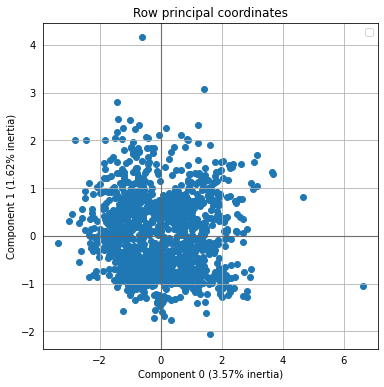

In [43]:
ax_famd_X = famd.plot_row_coordinates(
    X,ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1)

### PCA on the Quantitative data

In [72]:
X_cat = X.select_dtypes(["object","category"])
X_cont = X.select_dtypes(["float64","int64"]) 
print(X_cat.shape)
print(X_cont.shape)

(1460, 46)
(1460, 33)


In [62]:
pca = prince.PCA(
    n_components=30,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=2)
pca_X = pca.fit(X_cont)

In [67]:
pca_X.row_coordinates(X_cont)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.223864,0.583888,-0.689021,-2.308847,0.587562,-0.243395,0.946188,-0.287730,1.457035,-0.304045,0.903190,0.592792,-0.171262,0.299145,-0.828266,-0.404387,1.510010,0.975485,-0.165669,0.835913,0.111288,0.226597,0.046805,0.147784,0.552947,-0.313705,-0.005180,-0.297357,-0.199945,-0.294916
1,0.025928,-1.269955,0.936362,0.232401,-1.943025,3.695982,0.021506,-0.538325,0.335762,1.018939,-0.319785,1.338468,-0.968126,-2.018031,-0.926912,-0.001416,0.638716,0.526778,-0.472932,-0.458210,0.185889,-0.988772,0.098696,0.289207,-0.791628,-0.883616,0.659702,-0.041226,-0.244412,-0.307865
2,1.468154,0.393694,-0.809212,-1.781262,-0.033698,-0.019456,-0.095131,0.132635,1.273526,-0.920033,0.108530,-0.584293,-0.195351,-0.409472,0.797462,0.147597,0.526649,0.835279,-0.061756,1.084554,-0.653189,0.083860,0.236046,-0.411512,0.381879,-0.419979,0.696932,0.127513,0.340364,0.479589
3,-0.303685,0.917583,1.352397,0.311738,0.280106,-1.277877,2.581456,-0.532029,0.472160,-2.053760,0.869081,0.532832,-3.603980,-0.320112,0.784053,0.263499,0.597403,0.308242,0.350986,-0.246833,0.834669,-0.384798,-0.204089,-1.368052,1.047252,-0.113228,-0.671250,0.060457,0.364944,-0.097580
4,4.106951,1.030394,-0.089693,-1.528962,-0.025381,0.655115,-0.328397,-0.207568,0.828447,-1.281982,-0.313077,-1.375028,-0.044861,-0.511621,0.885121,0.915972,0.618455,1.495508,0.190964,0.006159,-0.151032,0.093633,-0.357556,-0.772743,0.309493,-0.144511,-0.142970,0.028144,-0.008140,-0.090146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.873539,1.584097,-1.736257,-0.193323,-0.272115,-0.724194,-0.640854,-0.141691,-1.182984,-0.147303,-0.354171,0.164586,0.671480,0.370908,0.329573,0.244279,-0.316427,-0.746617,-0.312209,0.715861,-0.659466,0.138729,0.629819,-0.126203,-0.086840,0.164428,0.637653,0.138860,-0.181183,-0.092056
1456,2.326290,-1.986102,1.857321,0.955143,0.213724,0.122709,0.559353,-1.318862,-1.147593,0.580026,0.362719,0.236687,0.621905,0.302043,-1.274281,-0.346588,-1.793312,-0.978561,-1.121097,-0.544388,-0.085005,-1.212526,0.540586,-0.117538,0.047778,0.258768,0.628594,-0.469142,0.172133,0.492979
1457,1.160065,3.009382,1.612996,0.636517,-1.723558,1.030132,0.606135,2.703623,-2.429797,1.256598,3.766458,-1.018805,0.927664,0.155128,-0.374735,-0.396954,-0.495629,-1.666842,-1.430780,0.833586,-1.112057,-1.611357,-0.745287,-0.364184,0.520092,0.171696,0.069495,0.709505,-0.250307,0.245752
1458,-2.611251,-2.069119,2.082407,-0.265623,-0.763627,-0.052342,0.357062,-3.244149,-1.050304,2.530741,-0.191834,-1.753459,-1.172329,4.228721,0.843569,-0.531192,-0.855772,-0.347296,-1.232008,-0.548583,0.788131,0.432058,0.759968,0.510934,0.548709,0.039387,-0.232489,0.478718,0.070448,-0.074857


In [78]:
pca_X.row_contributions(X_cont)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.234038,0.108151,0.220842,2.703237,0.235660,0.051329,0.797284,0.076649,1.988966,0.088778,0.794101,0.353249,0.030306,0.095102,0.732042,0.187161,2.668069,1.177335,0.035153,0.983075,0.019964,0.087496,0.004630,0.054989,1.006154,0.349079,0.000104,0.456969,0.262345,0.656770
1,0.000105,0.511620,0.407854,0.027389,2.577118,11.835789,0.000412,0.268302,0.105621,0.997074,0.099548,1.800911,0.968424,4.327948,0.916798,0.000002,0.477368,0.343333,0.286466,0.295389,0.055702,1.665982,0.020588,0.210590,2.062242,2.769539,1.688549,0.008784,0.392012,0.715713
2,0.336792,0.049169,0.304608,1.608976,0.000775,0.000328,0.008059,0.016287,1.519509,0.812902,0.011466,0.343192,0.039431,0.178186,0.678604,0.024933,0.324549,0.863221,0.004885,1.654880,0.687763,0.011984,0.117761,0.426369,0.479896,0.625657,1.884507,0.084030,0.760223,1.736827
3,0.014410,0.267092,0.850796,0.049280,0.053558,1.414866,5.934541,0.262064,0.208865,4.050705,0.735256,0.285402,13.420446,0.108900,0.655976,0.079466,0.417611,0.117556,0.157782,0.085718,1.123025,0.252316,0.088033,4.712224,3.609100,0.045477,1.748180,0.018890,0.873991,0.071901
4,2.635471,0.336804,0.003742,1.185460,0.000440,0.371854,0.096041,0.039889,0.643009,1.578320,0.095416,1.900638,0.002079,0.278178,0.835992,0.960253,0.447563,2.767177,0.046707,0.000053,0.036770,0.014939,0.270207,1.503454,0.315209,0.074076,0.079306,0.004093,0.000435,0.061363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.119230,0.796038,1.402314,0.018952,0.050546,0.454410,0.365743,0.018587,1.311129,0.020838,0.122108,0.027231,0.465875,0.146204,0.115904,0.068296,0.117162,0.689691,0.124843,0.720977,0.701044,0.032795,0.838377,0.040101,0.024816,0.095903,1.577564,0.099652,0.215421,0.063991
1456,0.845565,1.251335,1.604691,0.462626,0.031180,0.013046,0.278631,1.610404,1.233853,0.323092,0.128073,0.056315,0.399622,0.096954,1.732714,0.137483,3.763129,1.184774,1.609764,0.416947,0.011648,2.505302,0.617644,0.034784,0.007512,0.237521,1.533055,1.137463,0.194440,1.835168
1457,0.210273,2.872931,1.210275,0.205454,2.027821,0.919439,0.327187,6.767499,5.531306,1.516434,13.809695,1.043417,0.889167,0.025574,0.149846,0.180344,0.287442,3.437543,2.621933,0.977608,1.993496,4.424474,1.173965,0.333936,0.890137,0.104568,0.018738,2.601600,0.411150,0.456051
1458,1.065409,1.358130,2.017199,0.035779,0.398053,0.002374,0.113539,9.744003,1.033518,6.150730,0.035824,3.090776,1.420042,19.003970,0.759344,0.322941,0.856947,0.149231,1.944032,0.423398,1.001284,0.318100,1.220670,0.657278,0.990789,0.005503,0.209712,1.184373,0.032568,0.042314


In [64]:
PCA_X = pd.DataFrame()
PCA_X['ExplaineInertia'] = pca_X.explained_inertia_
PCA_X['EigenValues'] = pca_X.eigenvalues_
PCA_X['CummExplaineInertia'] = PCA_X.ExplaineInertia.cumsum()
print(pca_X.total_inertia_)
PCA_X

33.0


,ExplaineInertia,EigenValues,CummExplaineInertia
0,0.193940,6.400014,0.193940
1,0.095525,3.152314,0.289464
2,0.065143,2.149723,0.354608
3,0.059758,1.971998,0.414365
4,0.044392,1.464949,0.458758
5,0.034974,1.154151,0.493732
6,0.034027,1.122903,0.527759
7,0.032730,1.080100,0.560489
8,0.032344,1.067364,0.592834
9,0.031554,1.041283,0.624388


No handles with labels found to put in legend.


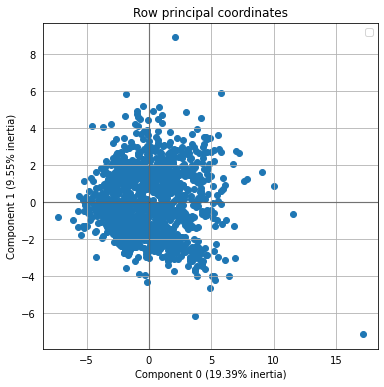

In [59]:
ax_pca_X = pca_X.plot_row_coordinates(
    X_cont,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    labels=None,
    color_labels=None,
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True)

No handles with labels found to put in legend.


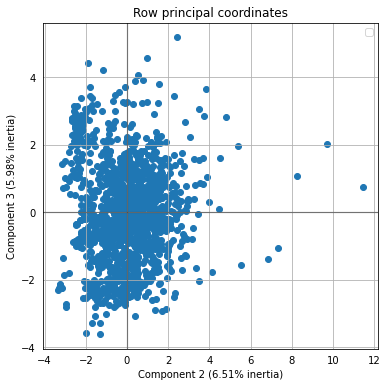

In [66]:
ax_pca_X = pca_X.plot_row_coordinates(
    X_cont,
    ax=None,
    figsize=(6, 6),
    x_component=2,
    y_component=3,
    labels=None,
    color_labels=None,
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True)

In [68]:
pca_X.column_correlations(X_cont)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
1stFlrSF,0.689965,-0.357629,0.248170,0.431177,0.120720,0.032450,-0.026886,0.057264,-0.002096,0.045169,-0.027861,0.003772,-0.022395,-0.012779,-0.043891,-0.084568,-0.033302,-0.036060,-0.094472,-0.058014,-0.079911,0.019651,-0.001304,0.100018,-0.037650,0.148019,-0.021631,-0.212113,0.055761,0.110238
2ndFlrSF,0.390708,0.761073,0.081299,-0.374834,-0.094385,-0.036927,0.061048,-0.041353,-0.013065,-0.103860,0.016645,0.002381,0.003082,0.004104,0.044174,-0.010124,0.011363,0.024030,0.009003,0.032304,0.039879,-0.003354,-0.075280,0.094825,0.179767,-0.028168,0.056551,0.159536,-0.052754,0.089585
3SsnPorch,0.040100,-0.055515,-0.047961,0.050904,-0.084664,0.356821,0.052411,0.336475,0.231829,-0.389795,-0.064565,0.352902,0.150785,0.530860,0.163593,-0.060652,-0.200791,-0.070186,-0.036380,-0.115475,0.098368,0.003985,0.000748,-0.023755,-0.005048,-0.002944,-0.016006,0.010312,-0.004320,-0.003097
BedroomAbvGr,0.334461,0.606850,0.287959,0.156849,0.055559,0.109898,-0.091516,-0.119346,-0.054826,-0.051531,-0.033304,0.009824,0.196359,0.063047,-0.170718,0.003416,0.162137,0.216803,-0.157015,0.103516,0.089906,-0.030417,-0.115051,-0.314176,-0.212215,0.020977,-0.065498,0.057455,0.105892,0.045934
BsmtFinSF1,0.362867,-0.577001,0.427876,-0.341024,0.176625,0.055844,0.052698,0.187421,-0.026859,-0.119122,-0.056309,0.080983,0.060227,-0.167472,-0.113192,0.012515,0.136796,0.008929,-0.113715,0.023436,0.018644,0.010541,-0.050408,0.157636,-0.116001,0.039952,-0.013202,0.127310,-0.011368,-0.052961
BsmtFinSF2,-0.024601,-0.155768,0.319504,-0.015244,-0.140225,-0.028746,-0.218753,-0.380303,0.099978,0.351281,-0.019913,-0.193182,-0.249056,0.595167,0.187367,-0.069114,0.021894,0.021557,-0.102984,0.024198,-0.109457,-0.036934,-0.037390,0.051288,-0.012333,0.002946,-0.007848,0.051438,-0.004605,-0.014124
BsmtFullBath,0.191614,-0.553967,0.368055,-0.395209,0.266740,-0.084376,0.095316,0.069542,0.028269,-0.078514,-0.018697,-0.177042,0.018592,0.111793,-0.081211,-0.018535,0.023709,0.048266,-0.072453,0.032074,0.032970,0.110580,-0.024734,-0.302836,0.231075,-0.136397,0.132674,-0.095619,0.016166,0.017336
BsmtHalfBath,-0.032121,-0.007773,0.129222,-0.013789,-0.307442,0.519962,-0.236010,-0.060492,-0.059254,0.230538,-0.246569,0.410675,-0.228836,-0.221956,0.022151,0.055310,0.312444,-0.182906,-0.092539,-0.016034,0.029537,0.056264,0.023999,-0.072020,0.108145,-0.052095,0.038737,-0.029029,0.003799,0.002770
BsmtUnfSF,0.315784,0.210477,-0.427605,0.709882,-0.081321,-0.094389,0.044139,-0.000188,0.024691,0.067478,0.043636,-0.009813,0.037869,-0.076433,0.042441,-0.101484,-0.111184,-0.074656,0.006167,-0.097107,-0.050137,0.204358,-0.088811,-0.146748,0.074352,-0.055677,0.115836,0.038593,-0.021561,-0.008899
EnclosedPorch,-0.180501,0.182711,0.292277,0.203583,0.011334,-0.146154,0.437855,-0.017058,-0.182760,-0.234530,-0.033700,-0.042790,-0.502966,-0.014042,0.303867,-0.015044,0.086405,-0.077690,-0.128144,0.045157,0.268727,0.126071,0.140771,-0.040444,-0.112305,-0.010235,-0.000764,-0.014676,-0.045124,0.007586


### Multiple correspondence analysis (MCA)

In [73]:
mca = prince.MCA(
    n_components=30,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=2)
mca_X = mca.fit(X_cat)

In [74]:
MCA_X = pd.DataFrame()
MCA_X['ExplaineInertia'] = mca_X.explained_inertia_
MCA_X['EigenValues'] = mca_X.eigenvalues_
MCA_X['CummExplaineInertia'] = MCA_X.ExplaineInertia.cumsum()
print(mca_X.total_inertia_)
MCA_X

16.47826086956522


,ExplaineInertia,EigenValues,CummExplaineInertia
0,0.014240,0.234648,0.014240
1,0.009029,0.148789,0.023269
2,0.008418,0.138706,0.031687
3,0.006825,0.112457,0.038511
4,0.006133,0.101066,0.044645
5,0.005604,0.092338,0.050248
6,0.004779,0.078751,0.055027
7,0.004530,0.074654,0.059558
8,0.004352,0.071720,0.063910
9,0.004196,0.069140,0.068106


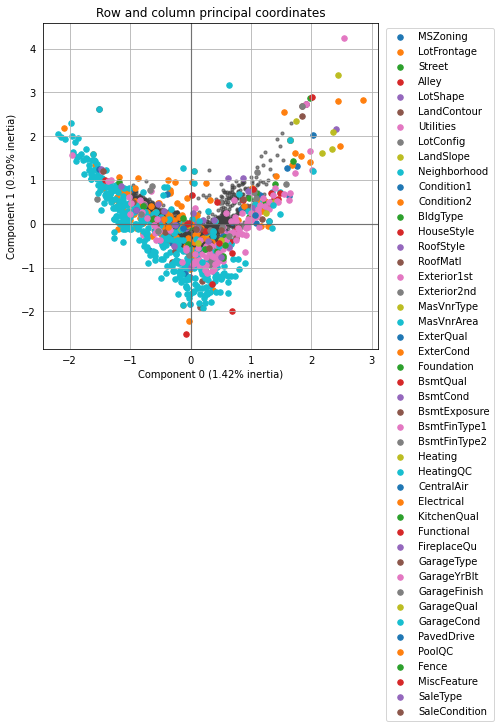

In [77]:
ax_mca_X = mca_X.plot_coordinates(
    X=X_cat,
    ax=None,
    figsize=(6, 6),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1)

ax_mca_X.legend(bbox_to_anchor=(1.01, 1), loc='upper left')